In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#here , all the imgs are in BGR OPenCV fornat to do ops on, and the show pics are conv to RGB to plot using plt

dark_horse = cv2.imread('../DATA/horse.jpg')
show_horse = cv2.cvtColor(dark_horse, cv2.COLOR_BGR2RGB)

rainbow = cv2.imread('../DATA/rainbow.jpg')
show_rainbow =cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

blue_bricks = cv2.imread('../DATA/bricks.jpg')
show_bricks = cv2.cvtColor(blue_bricks, cv2.COLOR_BGR2RGB)

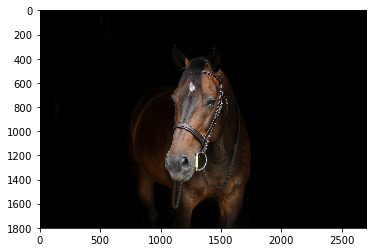

In [5]:
plt.imshow(show_horse)

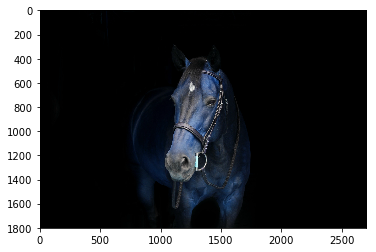

In [7]:
plt.imshow(dark_horse) #here bgr

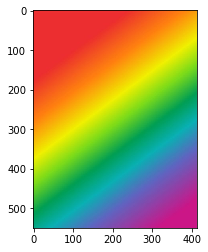

In [8]:
plt.imshow(show_rainbow)

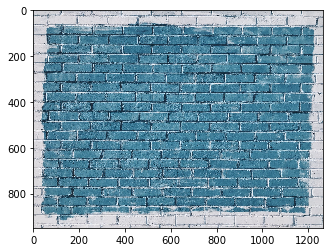

In [9]:
plt.imshow(show_bricks)

In [11]:
#histCalc function usage

#calc for blue
hist_vals = cv2.calcHist([blue_bricks], channels = [0], mask = None, histSize = [256], ranges = [0, 256])

# * images : it is the source image of type uint8 or float32. it should be given in square brackets, ie, “[img]”.
# * channels : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
# * mask : mask image. To find histogram of full image, it is given as “None”. But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. 
# * histSize : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
# * ranges : this is our RANGE. Normally, it is [0,256].

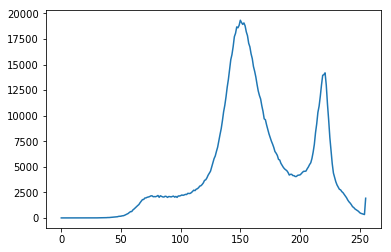

In [12]:
plt.plot(hist_vals)

In [13]:
horse_hist_vals = cv2.calcHist([dark_horse], channels = [0], mask = None, histSize = [256], ranges = [0, 256]) #ntoe here the image is big and is mostly BLACK

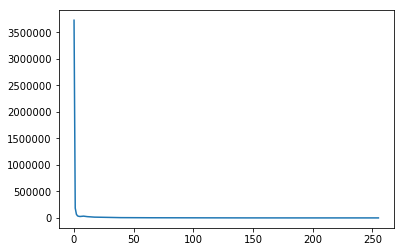

In [14]:
plt.plot(horse_hist_vals)  #most vals will be around zero

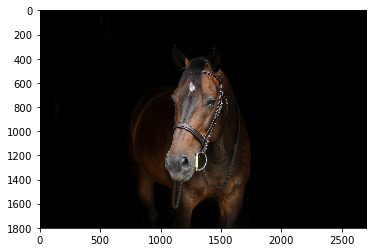

In [15]:
plt.imshow(show_horse)

## 3 Color histograms

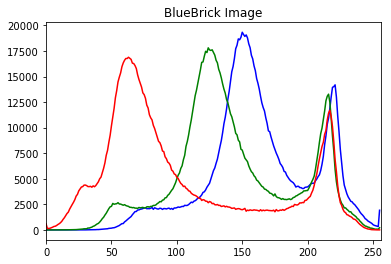

In [16]:
img = blue_bricks
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color = col)
    plt.xlim([0, 256])
plt.title('BlueBrick Image')
plt.show()

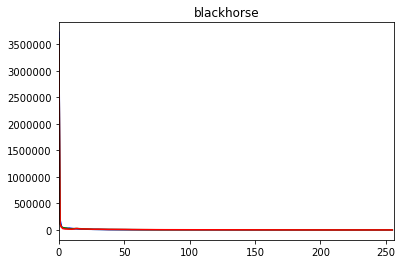

In [17]:
img2 = dark_horse

color = ('b', 'g', 'r')
for i, col in enumerate(color):
    hist = cv2.calcHist([img2], [i], None, [256], [0, 256])
    plt.plot(hist, color = col)
    plt.xlim([0, 256])
    
plt.title('blackhorse')
plt.show()    

In [20]:
#the values are all pushed towards zero and skewed as many pixels are zero (img is big)
img2.shape

(1800, 2700, 3)

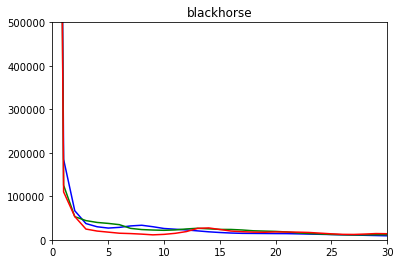

In [22]:
img2 = dark_horse

color = ('b', 'g', 'r')
for i, col in enumerate(color):
    hist = cv2.calcHist([img2], [i], None, [256], [0, 256])
    plt.plot(hist, color = col)
    plt.xlim([0, 30])
    plt.ylim([0, 500000])
    
plt.title('blackhorse')
plt.show()  

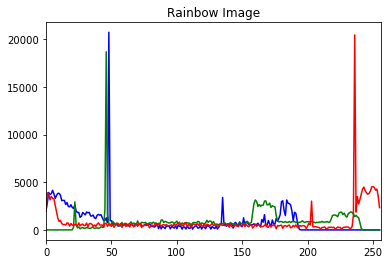

In [23]:
img = rainbow
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Rainbow Image')
plt.show()

In [25]:
#mask a certain part of the image

img = rainbow
img.shape

(550, 413, 3)

In [26]:
#create a mask

mask = np.zeros(img.shape[:2], dtype = np.uint8)
mask[300:400, 100:400] = 255

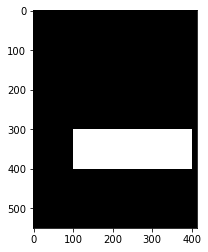

In [28]:
plt.imshow(mask, cmap = 'gray')

In [29]:
#IN OUR CASE BITWISE AND & OR HAVE NO DIFF USAGE AS BOTH THE IMAGES USED ARE THE SAME AND HENCE SIMILAR RESULTS WILL BE OBTAINED

#here the first example used is the bgr on which ops are done
#second is for display

masked_img = cv2.bitwise_and(img, img, mask = mask)
show_masked_image = cv2.bitwise_and(show_rainbow, show_rainbow, mask = mask)

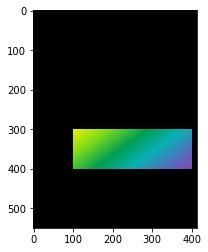

In [30]:
plt.imshow(show_masked_image)

In [31]:
hist_full_image_red = cv2.calcHist([rainbow], channels = [2], mask = None, histSize = [256], ranges = [0, 256])
hist_masked_image_red = cv2.calcHist([rainbow], channels = [2], mask = mask, histSize = [256], ranges = [0, 256])

Text(0.5,1,'RED histo for full img')

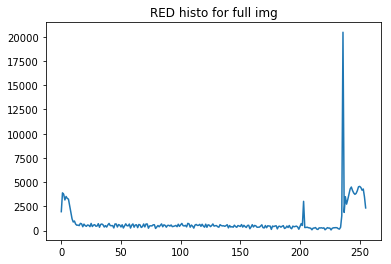

In [32]:
plt.plot(hist_full_image_red)
plt.title('RED histo for full img') #this a lot of red

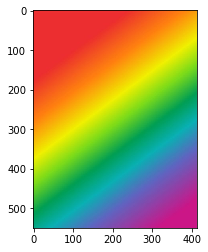

In [35]:
plt.imshow(show_rainbow)  #show in rgb, red is there and hist confirms

Text(0.5,1,'RED histo for masked img')

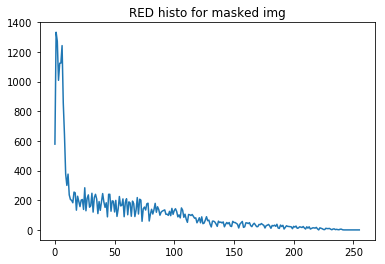

In [38]:
plt.plot(hist_masked_image_red)
plt.title('RED histo for masked img') #this has minimal and a lot of black

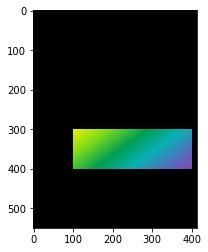

In [39]:
plt.imshow(show_masked_image)  #image for above histo

In [40]:
#histogram equalisation - Like gamma correction adjust the brightness of the img, here
#the range is broadened where min val scaled to 0 and max val scaled to 255, and contrast of the img is adjusted
#a dark img with less features shown will be more visible
#contrast is changed by changing the pdf of the given img pixel intensities

In [3]:
#hist equalisation = on grayscale and on color img (done in hsv space by tuning the value channel)

#gray

gorilla = cv2.imread('../DATA/gorilla.jpg', 0)


In [4]:
def display(img, cmap = None):
    fig = plt.figure(figsize = (10, 8))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap)

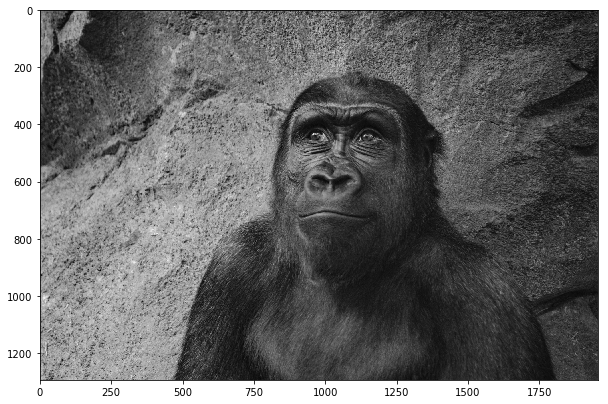

In [5]:
display(gorilla, cmap = 'gray')

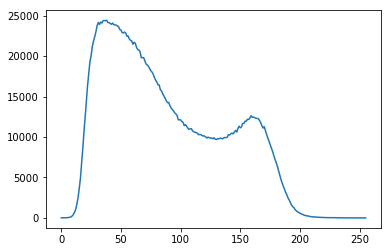

In [6]:
#equalize Hist

#first plot the current Histogram

hist_gray = cv2.calcHist([gorilla], [0], mask = None, histSize = [256], ranges = [0, 256])
plt.plot(hist_gray)

In [7]:
#equalizeHisto

eq_gorilla = cv2.equalizeHist(gorilla)

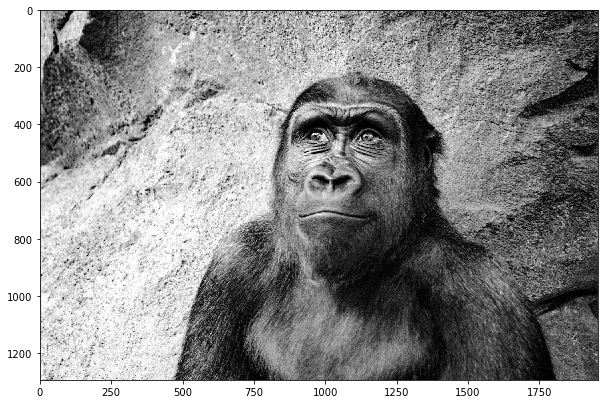

In [9]:
display(eq_gorilla, cmap = 'gray') #bg on left is more towards 255 and right corners more towards 0

In [10]:
hist_eq_gray = cv2.calcHist([eq_gorilla], channels = [0], mask = None, histSize = [256], ranges = [0, 256])

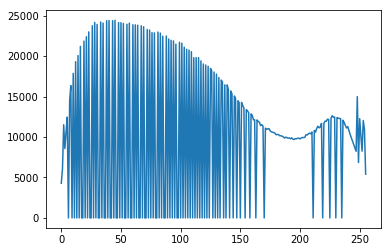

In [12]:
plt.plot(hist_eq_gray) #curve is way smoother

In [13]:
#apply on the color image

color_gorilla = cv2.imread('../DATA/gorilla.jpg')
show_gorilla = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2RGB)

hsv = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2HSV)

In [14]:
#adjust the V channel
hsv[:, :, 2] = cv2.equalizeHist(hsv[:, :, 2])

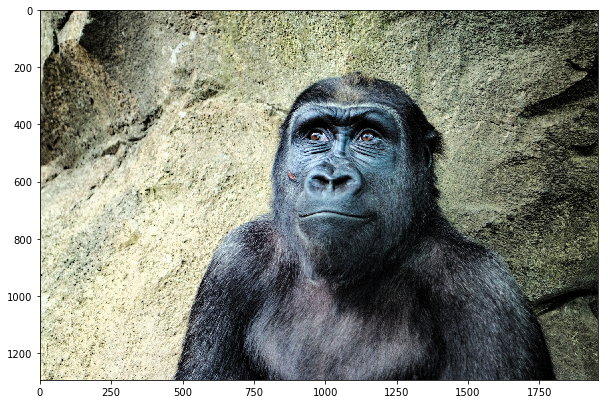

In [15]:
#conv to rgb for display

eq_color_gorilla = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
display(eq_color_gorilla)